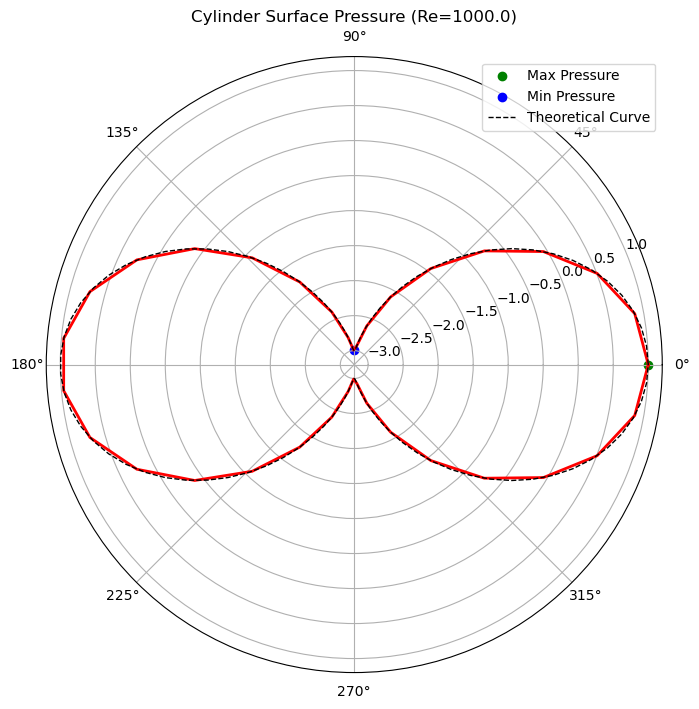

驻点 (θ = 0°, 180°) 的 Cp: [1. 1.]
90° 与 270° 处的 Cp: [-3. -3.]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class AerodynamicCalculator:
    def __init__(self, U, a, rho=1.225):
        self.U = U  # 来流速度 (m/s)
        self.a = a  # 圆柱半径 (m)
        self.rho = rho  # 空气密度 (kg/m³)

    def compute_pressure(self, z_samples):
        """ 计算指定位置的压力系数 """
        V = self.U * (1 - (self.a**2)/(z_samples**2))
        V_mag = np.abs(V)
        Cp = 1 - (V_mag/self.U)**2
        return Cp

    def export_report(self, filename):
        """ 生成标准化气动分析报告 """
        # 生成角度序列与采样坐标
        theta = np.linspace(0, 2*np.pi, 36)
        z_samples = self.a * np.exp(1j*theta)

        # 计算各参数
        Cp = self.compute_pressure(z_samples)
        V = self.U * (1 - (self.a**2)/(z_samples**2))

        # 构建 DataFrame 并导出
        df = pd.DataFrame({
            'theta_deg': np.degrees(theta),
            'Cp': Cp,
            'V_real': V.real,
            'V_imag': V.imag
        })
        df.to_csv(filename, index=False, float_format='%.4f')

    def visualize_pressure(self, Re):
        """ 可视化圆柱表面压力分布 """
        theta = np.linspace(0, 2*np.pi, 36)
        z_samples = self.a * np.exp(1j*theta)
        Cp = self.compute_pressure(z_samples)

        plt.figure(figsize=(8, 8))
        plt.subplot(polar=True)
        plt.plot(theta, Cp, 'r-', lw=2)

        # 标注最大/最小压力点坐标
        max_index = np.argmax(Cp)
        min_index = np.argmin(Cp)
        plt.scatter(theta[max_index], Cp[max_index], color='g', label='Max Pressure')
        plt.scatter(theta[min_index], Cp[min_index], color='b', label='Min Pressure')

        # 添加理论曲线对比
        theta_theory = np.linspace(0, 2*np.pi, 100)
        z_theory = self.a * np.exp(1j*theta_theory)
        Cp_theory = self.compute_pressure(z_theory)
        plt.plot(theta_theory, Cp_theory, 'k--', lw=1, label='Theoretical Curve')

        plt.title(f'Cylinder Surface Pressure (Re={Re:.1f})')
        plt.legend()
        plt.savefig('pressure_distribution.png')
        plt.show()


if __name__ == "__main__":
    U = 1.0  # 来流速度
    a = 1.0  # 圆柱半径
    Re = 1000  # 雷诺数

    calculator = AerodynamicCalculator(U, a)
    calculator.export_report('aerodynamic_report.csv')
    calculator.visualize_pressure(Re)

    # 物理验证
    theta_stagnation = [0, np.pi]
    z_stagnation = a * np.exp(1j * np.array(theta_stagnation))
    Cp_stagnation = calculator.compute_pressure(z_stagnation)
    print(f"驻点 (θ = 0°, 180°) 的 Cp: {Cp_stagnation}")

    theta_extreme = [np.pi / 2, 3 * np.pi / 2]
    z_extreme = a * np.exp(1j * np.array(theta_extreme))
    Cp_extreme = calculator.compute_pressure(z_extreme)
    print(f"90° 与 270° 处的 Cp: {Cp_extreme}")